In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils import preprocessing
from utils import regression
from utils import evaluate

['sans-serif']
['NanumGothicOTF']


In [212]:
data = pd.read_csv('./data/daejon_people_card.csv',engine='python')

data.shape


(1185, 57)

In [213]:
data.columns[18:]

Index(['일반음식점', '악기', '전자상거래', '기타유통', '직물/침구류', '학습자재', '가례서비스', '건축관련업',
       '레저/스포츠', '전자제품', '주방용품', '문화/취미', '가구', '음식료품', '숙박', '보험', '관광여행',
       '연료판매', '학원', '주유', '요금', '유흥', '의류', '학교', '사무기기', '소매', '회비', '대형유통',
       '의료기관/제약', '기타제조/도매', '비영리유통', '용역서비스', '신변잡화', '운송기구판매', '유아교육기관',
       '자동차정비/유지', '휴게음식점', '미용', '수리서비스'],
      dtype='object')

In [214]:
li = [[header, data[data[header]!=0].shape[0]] for header in data.columns[18:]]
li.sort(key = lambda x:x[1], reverse=True)
li

[['일반음식점', 1185],
 ['소매', 1145],
 ['미용', 1144],
 ['의료기관/제약', 1140],
 ['휴게음식점', 1117],
 ['음식료품', 1007],
 ['유아교육기관', 994],
 ['자동차정비/유지', 980],
 ['유흥', 943],
 ['의류', 800],
 ['학원', 779],
 ['용역서비스', 778],
 ['레저/스포츠', 706],
 ['문화/취미', 697],
 ['신변잡화', 578],
 ['건축관련업', 464],
 ['숙박', 362],
 ['기타제조/도매', 306],
 ['학습자재', 285],
 ['주유', 271],
 ['전자제품', 208],
 ['직물/침구류', 183],
 ['사무기기', 179],
 ['주방용품', 149],
 ['가구', 149],
 ['기타유통', 107],
 ['운송기구판매', 54],
 ['수리서비스', 54],
 ['전자상거래', 36],
 ['비영리유통', 34],
 ['요금', 30],
 ['가례서비스', 25],
 ['회비', 25],
 ['연료판매', 21],
 ['관광여행', 19],
 ['악기', 15],
 ['대형유통', 15],
 ['학교', 7],
 ['보험', 3]]

In [215]:
# data = preprocessing.get_specific_dong(data, dongname='신인동')
# data.shape

In [217]:
data[data['자동차정비/유지']!=0]['자동차정비/유지'].describe().astype(np.int64)

count           980
mean      300561794
std       346128037
min          608958
25%        63327807
50%       195837736
75%       373258818
max      1976123712
Name: 자동차정비/유지, dtype: int64

# Prepare train, test data

In [257]:
train, test = preprocessing.split_traintest(data)
print(train.shape, test.shape)

(948, 57) (237, 57)


In [273]:
x_header = [x for x in data.columns if '미만' not in x and (x[0]=='남' or x[0]=='여')]
#x_header = ['남10대', '남20대', '남30대', '남60대', '남70대 이상', '여10대', '여20대', '여30대', '여60대', '여70대 이상']
#x_header = ['남10대', '남20대', '남30대', '남40대', '남50대', '여10대', '여20대', '여30대', '여40대', '여50대']


#x_header = ['남10대', '남20대']
# x_header = [x for x in data.columns if '미만' not in x and x[0]=='여']
# x_header = ['남10대', '남20대', '여10대', '여20대']
y_header = '자동차정비/유지'
print(x_header)
print(y_header)

['남10대', '남20대', '남30대', '남40대', '남50대', '남60대', '남70대 이상', '여10대', '여20대', '여30대', '여40대', '여50대', '여60대', '여70대 이상']
자동차정비/유지


In [274]:
x_train, y_train = preprocessing.split_xy(train, x_header, y_header)
x_test, y_test = preprocessing.split_xy(test, x_header, y_header)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(785, 14) (785,)
(195, 14) (195,)


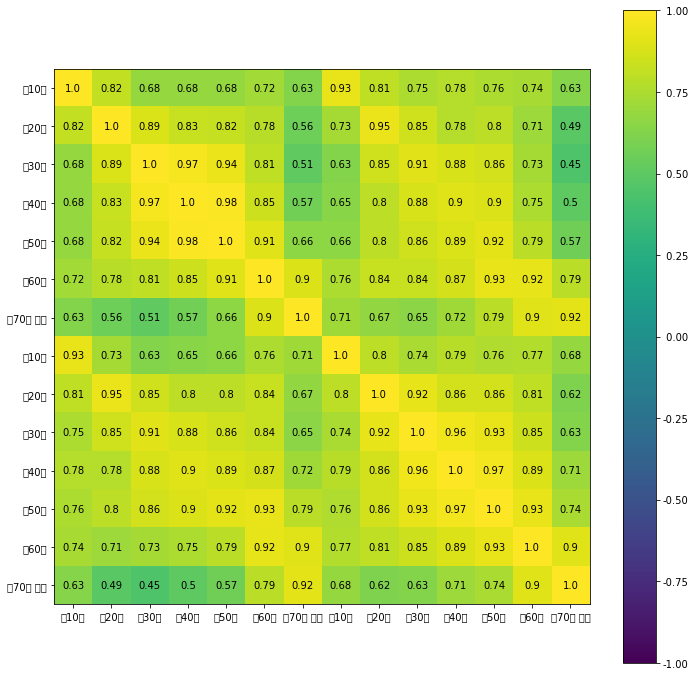

In [275]:
evaluate.visualize_CorrelCoeff_heatmap(x_train, x_header, figsize=(12, 12))

# Train regression model

In [276]:
model_LR = regression.get_model_LinearRegression(x_train, y_train)
model_Elastic = regression.get_model_ElasticNet(x_train, y_train)
model_SVR = regression.get_model_SVR(x_train, y_train)

C:\Users\ESLAB\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4427425920066224e+19, tolerance: 9762882307764270.0
  positive)


In [277]:
model_LR.coef_

array([ -556.25804982,    24.2013617 ,  -534.77353057,   280.50302362,
         523.55976787,  -227.68528595, -1339.64724796,   176.71608041,
         205.16062763,   -50.57902612,  -727.86463677,   684.56631687,
         -48.76522533,  1207.28765738])

# Evaluate

### Linear Regression

------- evaluate Linear Regression -------
RMSE : 230161935.174455
R2 : 0.468744
----------------------------


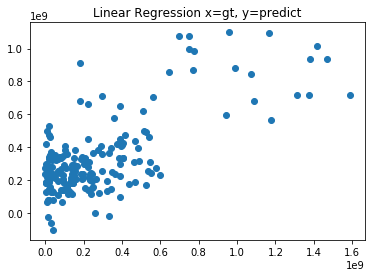

In [278]:
evaluate.eval_regression(y_test, model_LR.predict(x_test), model_name='Linear Regression')

### ElasticNet

------- evaluate ElasticNet -------
RMSE : 230164864.468991
R2 : 0.468730
----------------------------


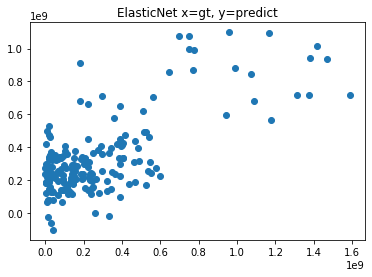

In [279]:
evaluate.eval_regression(y_test, model_Elastic.predict(x_test), model_name='ElasticNet')

### SVR

------- evaluate SVM Regression -------
RMSE : 322660462.025737
R2 : -0.044067
----------------------------


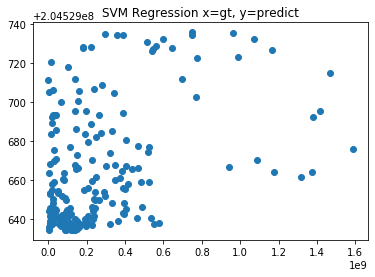

In [280]:
evaluate.eval_regression(y_test, model_SVR.predict(x_test), model_name='SVM Regression')

In [282]:
x_test.shape

(195, 14)

In [281]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

In [72]:
x_test.shape

(132,)

In [73]:
scaler = MinMaxScaler()
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
x_test_scaled = scaler.fit(x_test).transform(x_test)
y_test_scaled = scaler.fit(y_test).transform(y_test)
print(x_test_scaled.shape, y_test_scaled.shape)
print(x_test_scaled.min(), x_test_scaled.max(), y_test_scaled.min(), y_test_scaled.max())


(132, 1) (132, 1)
0.0 1.0 0.0 1.0000000000000002


In [68]:
x_test_scaled.sum(axis=1).shape

(132,)

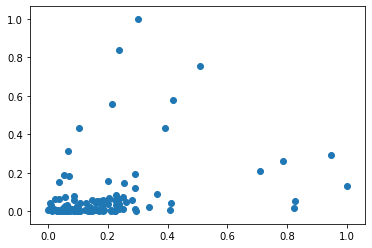

In [74]:
plt.scatter(x=x_test_scaled, y=y_test_scaled)